In [128]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context('paper', font_scale=1)


def mae(a, b):
    return np.round(np.nanmean(np.abs(a - b)), 3)

In [137]:
model_path = './climdex_results/indices/model/'
bcmodel_path = './climdex_results/indices/model_biascorrected/'
obs_path = './climdex_results/indices/observed/'

index = 'cdd'
t = 'ANN'

obs = pd.read_csv(f"{obs_path}/observed_{index}_{t}.csv", skiprows=6)
model = pd.read_csv(f"{model_path}/model_{index}_{t}.csv", skiprows=6)
bcmodel = pd.read_csv(f"{bcmodel_path}/model_biascorrected_{index}_{t}.csv", skiprows=6)

obs = obs.rename(columns={f' {index}': index})
model = model.rename(columns={f' {index}': index})
bcmodel = bcmodel.rename(columns={f' {index}': index})

obs = obs[['time', index]]
model = model[['time', index]]
bcmodel = bcmodel[['time', index]]
obs = obs.replace(-99.9, np.nan)

Text(0.5, 0.98, 'cdd ANN: MAE 42.448 -> 53.241')

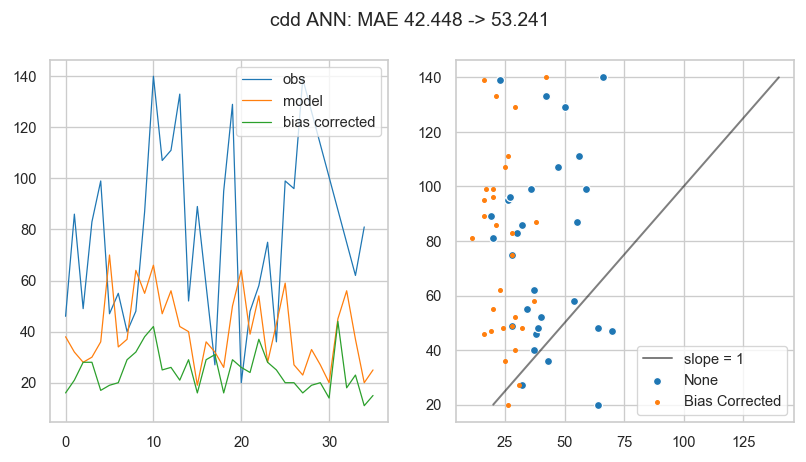

In [138]:
fig, axs = plt.subplots(figsize=(8, 4), nrows=1, ncols=2, dpi=120)

sns.lineplot(np.arange(len(obs[index])), np.array(obs[index]), label='obs', ax=axs[0], linewidth=0.75)
sns.lineplot(np.arange(len(model[index])), np.array(model[index]), label='model', ax=axs[0], linewidth=0.75)
sns.lineplot(np.arange(len(bcmodel[index])), np.array(bcmodel[index]), label='bias corrected', ax=axs[0], linewidth=0.75)

sns.scatterplot(np.array(model[index]), np.array(obs[index]), label='None', ax=axs[1])
sns.scatterplot(np.array(bcmodel[index]), np.array(obs[index]), label='Bias Corrected', s=5, ax=axs[1], edgecolor=None)
sns.lineplot(np.array(obs[index]), np.array(obs[index]), label='slope = 1', color='k', alpha=0.5, ax=axs[1])

plt.suptitle(f"{index} {t}: MAE {mae(obs[index], model[index])} -> {mae(obs[index], bcmodel[index])}")